<img src='https://babok-school.ru/wp-content/uploads/2021/09/prfcar0.png' width=1400 height=400>

<h1 style="font-size:24px; 
           background-image: linear-gradient(45deg, #87CEFA, white);
           color: black;
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;"> Тестовое задание на позицию Бизнес-аналитик (junior)</h1>

<hr>

<p style='font-size: 20px; font-family: Roboto;'>Преамбула<br><br>
    В августе 2023 года я отправил отклик на позицию Бизнес-аналитика (junior). Мне было предложено пройти тестирование через бота в Telegram. Результаты этого тестирования + дополнительный анализ представлены в этом ноутбуке.</p>
<hr>

<p style="font-size:24px; 
           background-image: linear-gradient(45deg, #87CEFA, white);
           color: black;
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;">
    Навигация<br>
    <ul >
        <li><a href="#imp" style="text-decoration: none;font-size: 20px; font-family: Roboto;">Импорт библиотек</a></li>
        <li><a href="#eda" style="text-decoration: none;font-size: 20px; font-family: Roboto;">EDA - Разведочный анализ данный</a></li>
        <li><a href="#task1" style="text-decoration: none;font-size: 20px; font-family: Roboto;">Задание 1</a></li>
        <li><a href="#task2" style="text-decoration: none;font-size: 20px; font-family: Roboto;">Задание 2</a></li>
        <li><a href="#task3" style="text-decoration: none;font-size: 20px; font-family: Roboto;">Задание 3</a></li>
        <hr>
        <li><a href="#abc" style="text-decoration: none;font-size: 20px; font-family: Roboto;">ABC-анализ</a></li>
        <li><a href="#hyp" style="text-decoration: none;font-size: 20px; font-family: Roboto;">Проверка гипотез</a></li>
        <li><a href="#client" style="text-decoration: none;font-size: 20px; font-family: Roboto;">Анализ клиентов</a></li>
        <li><a href="#rfm" style="text-decoration: none;font-size: 20px; font-family: Roboto;">RFM-анализ</a></li>
        <li><a href="#prof" style="text-decoration: none;font-size: 20px; font-family: Roboto;">Анализ доходов</a></li>
        <li><a href="#conc" style="text-decoration: none;font-size: 20px; font-family: Roboto;">Заключение</a></li>


<h1 style="font-size:24px; 
           background-image: linear-gradient(45deg, #87CEFA, white);
           color: blakc;
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;" id='imp'>Импорт библиотек</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

<h1 style="font-size:24px; 
           background-image: linear-gradient(45deg, #87CEFA, white);
           color: blakc;
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;" id='eda'>EDA - Разведочный анализ </h1>

In [2]:
data_2019 = pd.read_excel('BA.xlsx', sheet_name='2019')
data_2020 = pd.read_excel('BA.xlsx', sheet_name='2020')

In [3]:
data_2019.head()

,Номер заказа,Номер магазина,Код товара,Дата поставки,Сумма поставки
0,97058.0,7121.0,494843.0,2019-01-24,9565.0
1,2968.0,7167.0,111937.0,2019-01-29,18907.0
2,2968.0,7167.0,218889.0,2019-01-29,54132.0
3,45863.0,7136.0,495715.0,2019-02-07,28023.0
4,45863.0,7136.0,495716.0,2019-02-07,59120.0


In [4]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Номер заказа    271 non-null    float64       
 1   Номер магазина  271 non-null    float64       
 2   Код товара      271 non-null    float64       
 3   Дата поставки   271 non-null    datetime64[ns]
 4   Сумма поставки  778 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 30.5 KB


<AxesSubplot:>

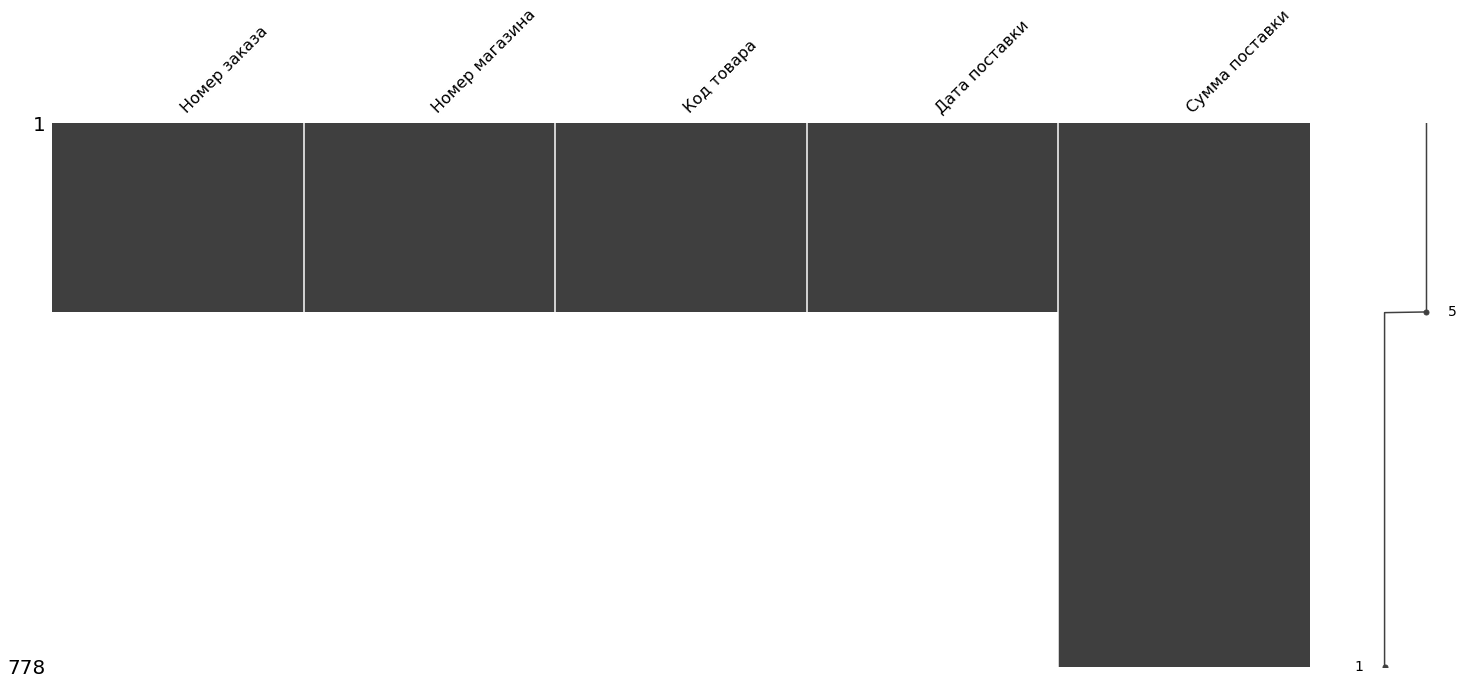

In [5]:
msno.matrix(data_2019)

<hr>
<div style='background-image: linear-gradient(45deg, #87CEFA, white);
           color: blakc;
           
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;
           font-size:16px;'>
<p>Для проведения анализа и выполнения заданий, сумма поставки бесполезна без остальных фич, поэтому удаляем все ненужные строки из датасетов</p></div>
<hr>

In [6]:
data_2019 = data_2019.iloc[:271, :]

In [7]:
#переводим номера магазина, заказа и код товара в int
data_2019 = data_2019.astype({'Номер магазина':np.int32, 'Номер заказа':np.int32, 'Код товара':np.int32})

In [8]:
data_2019.describe()

,Номер заказа,Номер магазина,Код товара,Сумма поставки
count,271.000000,271.000000,271.000000,271.000000
mean,40986.944649,7137.667897,446526.763838,35093.892989
std,27813.750049,18.439502,113515.037259,18974.208401
min,2968.000000,7110.000000,111864.000000,1267.000000
25%,21924.000000,7125.000000,497028.000000,18893.500000
50%,40155.000000,7135.000000,497032.000000,37466.000000
75%,50755.000000,7155.000000,497035.000000,52605.500000
max,112601.000000,7167.000000,509369.000000,65583.000000


In [9]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048304 entries, 0 to 1048303
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Номер заказа    507 non-null      float64       
 1   Номер магазина  507 non-null      float64       
 2   Код товара      507 non-null      float64       
 3   Дата поставки   507 non-null      datetime64[ns]
 4   Сумма поставки  1047810 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 40.0 MB


<AxesSubplot:>

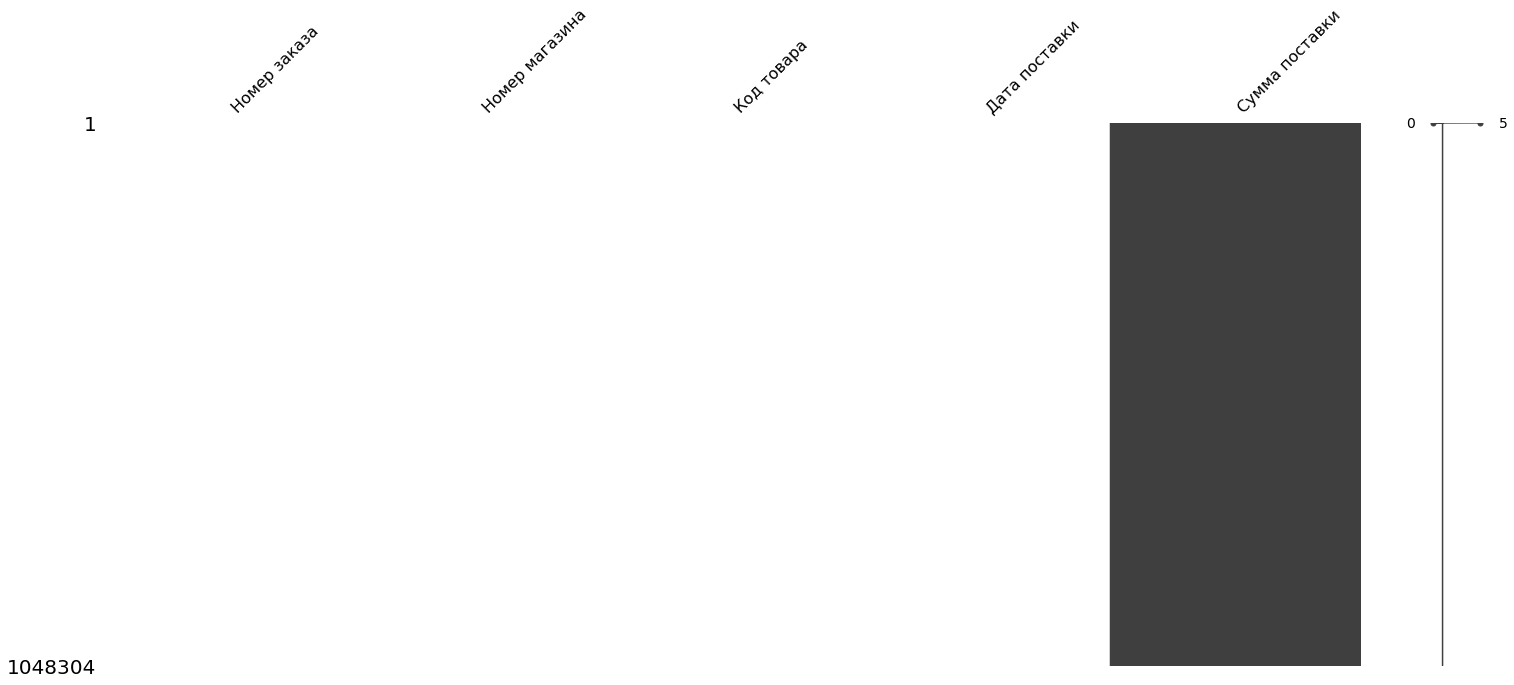

In [10]:
msno.matrix(data_2020)

In [11]:
data_2020 = data_2020.iloc[:507, :]
data_2020 = data_2020.astype({'Номер магазина':np.int32, 'Номер заказа':np.int32, 'Код товара':np.int32})

In [12]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Номер заказа    507 non-null    int32         
 1   Номер магазина  507 non-null    int32         
 2   Код товара      507 non-null    int32         
 3   Дата поставки   507 non-null    datetime64[ns]
 4   Сумма поставки  507 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(3)
memory usage: 14.0 KB


In [13]:
data_2020.describe()

,Номер заказа,Номер магазина,Код товара,Сумма поставки
count,507.000000,507.000000,507.000000,507.000000
mean,52150.370809,7137.840237,411595.812623,33227.370809
std,29487.910887,16.089919,141994.977992,19057.057157
min,3491.000000,7110.000000,111855.000000,1308.000000
25%,33760.000000,7126.000000,237553.000000,16214.000000
50%,53061.000000,7136.000000,512016.000000,32328.000000
75%,64473.000000,7158.000000,518703.000000,50635.000000
max,130090.000000,7167.000000,524468.000000,65891.000000


In [14]:
#добавляем фичу "Год", так как все задания будут ориентированы именно на фильтр по году
data_2019['Год'] = data_2019['Дата поставки'].dt.year
data_2020['Год'] = data_2020['Дата поставки'].dt.year

<hr>

<p style='font-size: 20px; font-family: Roboto'>✒ Задания копировались из Telegram 1 к 1, орфография сохранена</p>
<hr>

<h1 style="font-size:20px; 
           background-image: linear-gradient(45deg, #87CEFA, white);
           color: blakc;
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;" id='task1'>
Задание 1: Сверить 2 года и определить Новинки (товары которые стали поставлять только в 2020 году). Посчитать сумму поставки Новинок за 2020 год.</h1>

In [15]:
#запишем все товары, которые поставлялись в 2019 году в список, они нам ещё много раз пригодятся
code = data_2019['Код товара'].to_list()

In [16]:
# После того, как мы записали в список все коды товаров, которые поставлялись в 2019 году, мы напишем
# условие к датасету 2020 года, по которому исключим все товары, коды которых есть в списке и посчитаем сумму поставок
data_2020[~data_2020['Код товара'].isin(code)].agg({'Сумма поставки' : 'sum'})

Сумма поставки    15096275.0
dtype: float64

<hr>
<h3 style='font-family: Roboto;'> Ответ: 15096275.0 </h3>
<hr>

<h1 style="font-size:20px; 
           background-image: linear-gradient(45deg, #87CEFA, white);
           color: black;
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;" id='task2'> Задание 2: Сделать сравнение год к году по продажам товаров, которые были не Новинками. Год к году — значит не сравнивать в разрезе дней. Найти код товара, у которого был самый высокий прирост поставок в 2020 году в сравнении с 2019.</h1>

In [17]:
data_2019_count = data_2019\
    .groupby('Код товара', as_index=False)\
    .agg({'Сумма поставки': 'sum'})

In [18]:
#повторяем операцию группировки по кодам товаров, исключая новинки (код товара должен присутствовать в кодах 2019 года)
data_2020_count = data_2020[data_2020['Код товара'].isin(code)]\
    .groupby('Код товара', as_index=False)\
    .agg({'Сумма поставки': 'sum'})

In [19]:
growth = data_2020_count.merge(data_2019_count, left_on='Код товара', \
                               right_on='Код товара', suffixes=(' 2019', ' 2020'))

In [20]:
growth['Прирост поставок 2020'] = growth['Сумма поставки 2019'] - growth['Сумма поставки 2020']

In [21]:
#сортируем по убыванию, оставляем один товар - так как в этом и состоит наша задача
growth.sort_values(by='Прирост поставок 2020', ascending=False).head(1)

,Код товара,Сумма поставки 2019,Сумма поставки 2020,Прирост поставок 2020
32,495720,78619.0,4028.0,74591.0


<hr>
<h3 style='font-family: Roboto;'> Ответ: 495720 </h3>
<hr>

<h1 style="font-size:20px; 
           background-image: linear-gradient(45deg, #87CEFA, white);
           color: blakc;
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;" id='task3'> Задание 3: Провести АВС анализ товаров двух лет по принципу: категория А - 50% всех сумм поставок, категория В - 30%, С- 20%. Сравнить количество уникальных кодов товаров для каждой категории АВС год к году. Определить товары категории А в 2019 и в 2020 в сумма (сложить количество товаров категории А 2019 и 2020 года и вписать цифру).</h1>

<hr>
<p style='font-size: 20px; font-family: Roboto;'>🤦‍♂️Для справки<br><br>
    <b>ABC-анализ</b> основан на эмпирическом законе Парето: 
    <ul style='font-size: 20px; font-family: Roboto;'>
        <li>A - 20% усилий (ассортимента) дают 80% результата (продаж) </li>
        <li>B - 30% усилий (ассортимента) дают 15% результата (продаж)</li>
        <li>C - 50% усилий (ассортимента) дают 5% результата (продаж) </li>
    </ul></p>

<p style='font-size: 20px; font-family: Roboto;'>Выполним задание, а потом проведём правильный ABC-анализ</p>

<hr>

In [22]:
#поскольку мы будет проводить 4 ABC-анализа (2 неправильных и 2 правильных), имеет смысл написать функцию,
#которая будет возвращать список с группами

#на вход функция принимает датафрейм и 2 разделителя
def ABC_analysis(data, a, b):
    #сгруппируем данные по коду товара, посчитаем сумму поставок и запишем всё в переменную dfsale
    dfsale = data.groupby(['Код товара'], as_index=False)\
        .agg({'Сумма поставки':'sum'})\
        .sort_values(by='Сумма поставки', ascending=False)
    #создаём новую фичу 'part', которая будет хранить долю поставок от общей суммы
    dfsale['part'] = dfsale['Сумма поставки']/dfsale['Сумма поставки'].sum()*100
    #создаём новую фичу 'cum_part', которая будет хранить совокупную сумму долей
    dfsale['cum_part']=dfsale['part'].cumsum()
    #создаём новую фичу 'group' и с помощью lambda-функции разделим товары на 3 группы ABC
    #используем разделители, чтобы у нас была возможность самим выбирать границы раздела
    result = dfsale['cum_part'].apply(lambda x: 'A' if x < a else ('B' if a <= x < b else 'C')).to_list()
    #возвращаем список 
    return result

In [23]:
#группируем товары по коду товара, считаем сумму поставки, сортируем по убыванию суммы поставки
dfsale_2019 = data_2019.groupby(['Код товара'], as_index=False)\
    .agg({'Сумма поставки':'sum'})\
    .sort_values(by='Сумма поставки', ascending=False)
#используем нашу функцию, чтобы присвоить товарам группу (сначала неправильно)
dfsale_2019['abc_group'] = ABC_analysis(dfsale_2019, 50, 80)

In [24]:
#повторяем все шаги для 2020 года
dfsale_2020 = data_2020.groupby(['Код товара'], as_index=False)\
    .agg({'Сумма поставки':'sum'})\
    .sort_values(by='Сумма поставки', ascending=False)

In [25]:
dfsale_2020['abc_group'] = ABC_analysis(dfsale_2020, 50, 80)

In [26]:
#подсчитываем количество товаров в каждой группе и каждом году

In [27]:
dfsale_2019['abc_group'].value_counts()

C    52
A     6
B     6
Name: abc_group, dtype: int64

In [28]:
dfsale_2020['abc_group'].value_counts()

C    67
B    19
A    13
Name: abc_group, dtype: int64

<hr>
<h3 style='font-family: Roboto;'> Ответ: 19 </h3>
<hr>

<hr>
<p style='font-size: 20px; font-family: Roboto;'> На этом этапе, я отправил 19 проверяющей системе и получил ответ, что все мои ответы правильные. Однако продолжать тестирование я не стал по причине того, что усомнился в работодателе (были дополнительные причины). Кроме того, дальнейшее тестирование проводилось в Power BI.</p><hr>

<hr style="border: 2px solid red;">

<h1 style="font-size:20px; 
           background-image: linear-gradient(45deg, #87CEFA, white);
           color: blakc;
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;" id='abc'> Проводим правильный ABC-анализ </h1>

In [29]:
dfsale_2019['abc_group'] = ABC_analysis(dfsale_2019, 80, 95)

In [30]:
#считаем количество групп
abc_count = dfsale_2019['abc_group'].value_counts()

In [31]:
#считаем сколько приходится на каждую группу
abc_sum = dfsale_2019.groupby('abc_group', as_index=False).agg({'Сумма поставки':'sum'})

In [32]:
dfsale_2020['abc_group'] = ABC_analysis(dfsale_2020, 80, 95)

In [33]:
abc_count_20 = dfsale_2020['abc_group'].value_counts()

In [34]:
abc_sum_20 = dfsale_2020.groupby('abc_group', as_index=False).agg({'Сумма поставки':'sum'})

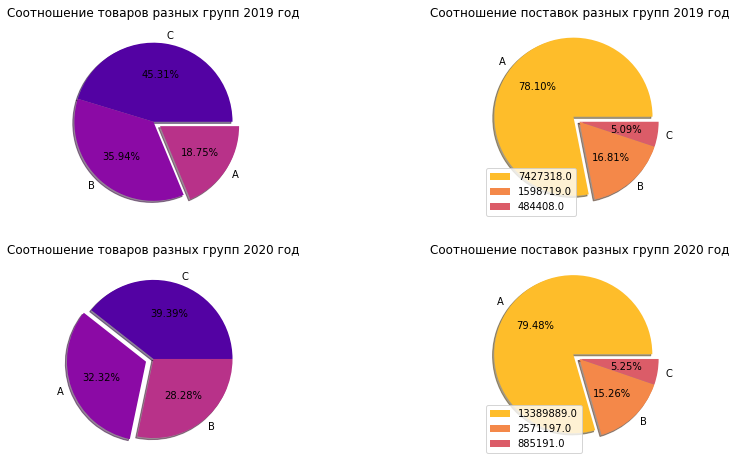

In [35]:
#Визуализируем эти данные
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

#2019 год
axs[0, 0].pie(x=abc_count.values, labels=abc_count.index,\
        colors=sns.color_palette('plasma'), autopct='%.2f%%',\
       explode=(0, 0, 0.1), shadow=True)
axs[0, 0].set_title('Соотношение товаров разных групп 2019 год', fontsize=12)

axs[0, 1].pie(x=abc_sum['Сумма поставки'], labels=abc_sum['abc_group'],
        colors=sns.color_palette('plasma_r'), autopct='%.2f%%',
       explode=(0.1, 0, 0), shadow=True)
axs[0, 1].set_title('Соотношение поставок разных групп 2019 год', fontsize=12)
axs[0, 1].legend(abc_sum['Сумма поставки'], loc=3)

#2020 год
axs[1, 0].pie(x=abc_count_20.values, labels=abc_count_20.index,\
        colors=sns.color_palette('plasma'), autopct='%.2f%%',\
       explode=(0, 0.1, 0), shadow=True)
axs[1, 0].set_title('Соотношение товаров разных групп 2020 год', fontsize=12)

axs[1, 1].pie(x=abc_sum_20['Сумма поставки'], labels=abc_sum_20['abc_group'],
        colors=sns.color_palette('plasma_r'), autopct='%.2f%%',
       explode=(0.1, 0, 0), shadow=True)
axs[1, 1].set_title('Соотношение поставок разных групп 2020 год', fontsize=12)
axs[1, 1].legend(abc_sum_20['Сумма поставки'], loc=3)


plt.show()

plt.show()

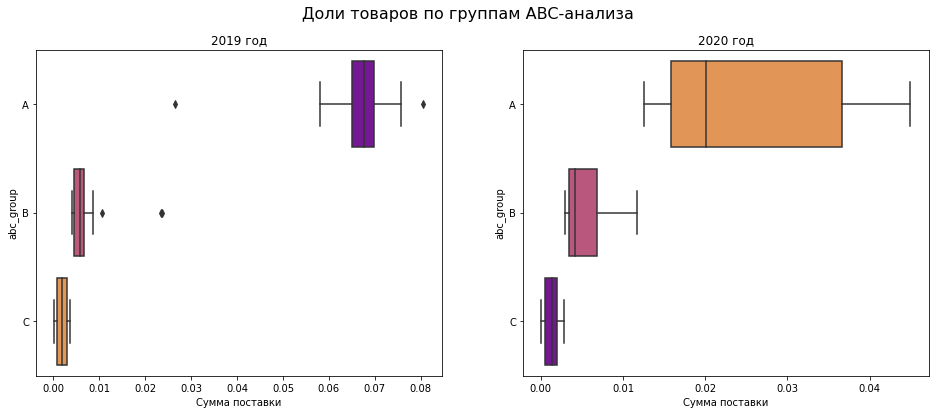

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle('Доли товаров по группам ABC-анализа', fontsize=16)
sns.boxplot(x=dfsale_2019['Сумма поставки']/dfsale_2019['Сумма поставки']\
            .sum(), ax=axs[0], palette='plasma', y=dfsale_2019['abc_group'])
sns.boxplot(x=dfsale_2020['Сумма поставки']/dfsale_2020['Сумма поставки']\
            .sum(), ax=axs[1], palette='plasma_r', y=dfsale_2020['abc_group'])
axs[0].title.set_text('2019 год')
axs[1].title.set_text('2020 год')
plt.show()

<hr>
<p style='font-size: 20px; font-family: Roboto;'>Мы видим, что на 1 графике за 2019 год, сработал закон Парето "20% усилий (товаров) дают 80% результата (продаж)". В нашем случае 18.75% товаров дали 78.10% сумм поставок. А вот в 2020 году, эмпирическое правило не сработало. Для получения 79.48% сумм поставок, потребовалось уже 32.32% товаров.<br>
    По графику 2, мы видим, что произошло расширение всех групп, увеличился размах и медиана сместилась к меньшим значениям.
    <br><br>Гипотеза 1: товары группы "А" 2019 года, которые приносили 78.10%, не поставлялись в 2020 году.<br>
        Гипотеза 2: расширился ассортимент товаров и новинки усреднили показатели.<br>
        Гипотеза 3: в 2020 году увеличились поставки товаров групп "B" и "C" 2019 года.<br>
        Гипотеза 4: есть дополнительные факторы, которые не отображены в данном датасете, повлиявшие на спрос.<br>
</p>
<hr>

<h1 style="font-size:20px; 
           background-image: linear-gradient(45deg, #87CEFA, white);
           color: blakc;
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;" id='hyp'>Гипотеза 1: товары группы "А" 2019 года не поставлялись в 2020 году </h1>

In [37]:
#Создадим переменную, которая будет хранить коды товаров группы "А" 2019 года
AGroup_2019 = dfsale_2019.loc[dfsale_2019['abc_group']=='A', 'Код товара'].to_list()

In [38]:
#добавим в список фильтр, чтобы убрать те значения, которые встречаются в 2020 году
AGroup_2019 = pd.DataFrame(AGroup_2019, columns=['Код товара'])
AGroupCode = AGroup_2019[~AGroup_2019['Код товара'].isin(data_2020['Код товара'].to_list())]

In [39]:
#Осталось проверить, сколько было заработано на этих товарах в 2019 году и какую долю они составляли
AGroupCode = AGroupCode['Код товара'].to_list()

In [40]:
#Посчитаем сумму поставок этих товаров в 2019 году
AGroupSum = data_2019[data_2019['Код товара'].isin(AGroupCode)]['Сумма поставки'].sum()

In [41]:
#Посчитаем сколько % от всей суммы поставок занимают наши товары
AGroupSum / data_2019['Сумма поставки'].sum()*100

39.86562142991206

In [42]:
AGroupSum

3791398.0

In [43]:
#Теперь проверим те, которые поставлялись в 2020, для этого просто убираем ~ из условия
AGroupCodeSup = AGroup_2019[AGroup_2019['Код товара'].isin(data_2020['Код товара'].to_list())]

In [44]:
AGroupSumSup = data_2020[data_2020['Код товара'].isin(AGroupCodeSup)].agg({'Сумма поставки': 'sum'})

In [45]:
AGroupSumSup

Сумма поставки    0.0
dtype: float64

In [46]:
AGroupSumSup / data_2020['Сумма поставки'].sum()*100

Сумма поставки    0.0
dtype: float64

<hr>
<p style='font-size: 20px; font-family: Roboto;'>6 из 12 товаров группы "А" 2019 года, которые приносили <b>40% от общей суммы поставок</b> в 2019 году на сумму <b>3.791.398 рублей</b>, не поставлялись в 2020 году.<br>Оставшиеся товары группы "А" принесли <b>506094.0</b> и составили <b>3.0%</b> от общей суммы поставок в 2020 году</p>
<hr>

<h1 style="font-size:20px; 
           background-image: linear-gradient(45deg, #87CEFA, white);
           color: blakc;
           font-family: Century Gothic, bold;
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;">Гипотеза 2: увеличился ассортимент товаров и новинки усреднили показатели

In [47]:
#считаем разницу в количестве товаров в 2020 и 2019 году
len(data_2020['Код товара'].value_counts()) - len(data_2019['Код товара'].value_counts())

35

<p style='font-size: 16px; font-family: Century Gothic'> Проверим сколько прибыли принесли "Новинки" и какую часть от общей суммы поставок составляют</p>

In [48]:
#исключаем из 2020 года коды, которые были в 2019 году, и считаем сумму поставок
sum_new_2020 = data_2020[~data_2020['Код товара'].isin(code)]['Сумма поставки'].sum()

In [49]:
#делим сумму поставок новинок на общую сумму поставок
sum_new_2020/dfsale_2020['Сумма поставки'].sum()*100

89.61193621593662

In [50]:
sum_new_2020

15096275.0

<hr>
<p style='font-size: 20px; font-family: Roboto;'>Ассортимент вырос на 35 позиций. Новинки принесли <b>15.096.275</b> и составили <b>89%</b> от общей суммы поставок в 2020 году. Это могло повлиять на показатели ABC-анализа в 2020 году.</p>
<hr>

<h1 style="font-size:20px; 
           background-image: linear-gradient(45deg, #87CEFA, white);
           color: blakc;
           font-family: Century Gothic, bold;
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;">Гипотеза 3: в 2020 году увеличились поставки товаров групп "B" и "C" 2019 года.</h1>

In [51]:
#записываем в переменную коды товаров групп "B" и "C"
BCCode = dfsale_2019.loc[dfsale_2019['abc_group'].isin(['B', 'C']), 'Код товара'].to_list()

In [52]:
#считаем сколько всего товаров этих групп
dfsale_2019[dfsale_2019['abc_group'].isin(['B', 'C'])].count()

Код товара        52
Сумма поставки    52
abc_group         52
dtype: int64

In [53]:
#считаем сколько из них посталялось в 2020 году
dfsale_2020[dfsale_2020['Код товара'].isin(BCCode)].count()

Код товара        36
Сумма поставки    36
abc_group         36
dtype: int64

In [54]:
#проверяем в каких группах они числятся
dfsale_2020[dfsale_2020['Код товара'].isin(BCCode)]['abc_group'].unique()

array(['B', 'C'], dtype=object)

In [55]:
#считаем сколько принесли в 2019 году
dfsale_2019[dfsale_2019['Код товара'].isin(BCCode)]['Сумма поставки'].sum()

2083127.0

In [56]:
#и сколько принесли в 2020 году
dfsale_2020[dfsale_2020['Код товара'].isin(BCCode)]['Сумма поставки'].sum()

1243908.0

In [57]:
(dfsale_2020[dfsale_2020['Код товара'].isin(BCCode)]['Сумма поставки'].sum()/\
dfsale_2019[dfsale_2019['Код товара'].isin(BCCode)]['Сумма поставки'].sum())*100-100

-40.286501975155616

In [58]:
data = data_2019[data_2019['Код товара'].isin(code)]\
    .merge(data_2020[data_2020['Код товара'].isin(code)], left_on='Код товара', right_on='Код товара')\
    .groupby('Код товара', as_index=False)\
    .agg({'Сумма поставки_x':'sum', 'Сумма поставки_y':'sum'})

In [59]:
data['outsiders'] = data['Сумма поставки_y'] - data['Сумма поставки_x']

In [60]:
data[data['outsiders'] < 0].sort_values(by='outsiders')

,Код товара,Сумма поставки_x,Сумма поставки_y,outsiders
36,497030,633412.0,87156.0,-546256.0
41,509369,225770.0,14850.0,-210920.0
37,497032,621724.0,440316.0,-181408.0
28,495716,118240.0,61756.0,-56484.0
8,178668,55429.0,1335.0,-54094.0
16,218988,54915.0,2727.0,-52188.0
6,167346,52734.0,4338.0,-48396.0
23,241129,64893.0,19092.0,-45801.0
29,495717,45829.0,1652.0,-44177.0
13,217825,22065.0,1891.0,-20174.0


<hr>
<p style='font-size: 20px; font-family: Roboto;'>36 из 52 позиций групп "B" и "C" 2019 года продолжили поставлятся в 2020. Сумма поставок упала с <b>2083127.0 до 1233908.0</b> или на <b>40%</b>. Спрос на 20 из 36 позиций упал в 2020. <br>
</p>
<hr>

<h1 style="font-size:20px; 
           background-image: linear-gradient(45deg, #87CEFA, white);
           color: blakc;
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;" id='client'>Анализ магазинов (клиентов)

<p style='font-size: 20px; font-family: Roboto;'>Следующим заданием проанализируем магазины, посмотрим какие из них приносят больше всего прибыли</p><br>

In [61]:
#Посчитаем сколько всего поставок было нашим клиентам в 2019 году
shop_2019 = data_2019.groupby(['Номер магазина'], as_index=False)\
    .agg({'Сумма поставки':'sum', 'Дата поставки':'count'})\
    .sort_values(by='Сумма поставки', ascending=False)

In [62]:
shop_2019

,Номер магазина,Сумма поставки,Дата поставки
20,7167,1394776.0,46
12,7136,879094.0,24
6,7126,609863.0,14
3,7118,594290.0,13
19,7161,500806.0,13
1,7111,495917.0,11
7,7128,481214.0,11
8,7129,478618.0,12
4,7121,469834.0,14
10,7134,454521.0,13


In [63]:
#посчитаем сколько поставок было нашим клиентам в 2020 году
shop_2020 = data_2020.groupby(['Номер магазина'], as_index=False)\
    .agg({'Сумма поставки':'sum', 'Дата поставки':'count'})\
    .sort_values(by='Сумма поставки', ascending=False)

In [64]:
shop_2020

,Номер магазина,Сумма поставки,Дата поставки
18,7158,2035274.0,66
10,7134,1479166.0,41
19,7161,1421475.0,39
12,7136,1296929.0,41
6,7126,1105069.0,32
3,7118,1082123.0,31
4,7121,797343.0,23
15,7140,737001.0,17
20,7167,712610.0,23
16,7146,687517.0,22


<hr>
<p style='font-size: 20px; font-family: Roboto;'>Здесь можно провести 2 анализа:
    <ul style='font-size: 20px; font-family: Roboto;'>
        <li>Провести RFM-анализ магазинов, чтобы установить наиболее ценных из них </li>
        <li>Провести анализ прироста сумм поставок в абсолютных и процентных значениях</li>
        </ul>
        </p>
        
<p style='font-size: 20px; font-family: Roboto;'>Начнём со второй задачи</p>
<hr>

In [65]:
#объединим данные за 2 года
sales_to_shops = shop_2019.merge(shop_2020, left_on='Номер магазина', right_on='Номер магазина', suffixes=('_2019', '_2020'))

In [66]:
#посчитаем прирост суммы поставки
sales_to_shops['Прирост суммы поставки'] = sales_to_shops['Сумма поставки_2020'] - sales_to_shops['Сумма поставки_2019']

In [67]:
#посчитаем процентное изменение суммы поставки
sales_to_shops['Прирост суммы поставки %'] =  \
    (sales_to_shops['Сумма поставки_2020']/sales_to_shops['Сумма поставки_2019'])* 100 - 100

In [68]:
sales_to_shops.sort_values(by=['Прирост суммы поставки'], ascending=False)

,Номер магазина,Сумма поставки_2019,Дата поставки_2019,Сумма поставки_2020,Дата поставки_2020,Прирост суммы поставки,Прирост суммы поставки %
18,7158,218986.0,6,2035274.0,66,1816288.0,829.408273
9,7134,454521.0,13,1479166.0,41,1024645.0,225.434028
4,7161,500806.0,13,1421475.0,39,920669.0,183.837454
19,7140,50208.0,2,737001.0,17,686793.0,1367.895554
20,7135,41474.0,2,566693.0,17,525219.0,1266.381347
2,7126,609863.0,14,1105069.0,32,495206.0,81.199548
3,7118,594290.0,13,1082123.0,31,487833.0,82.086692
1,7136,879094.0,24,1296929.0,41,417835.0,47.530184
17,7139,281316.0,11,652626.0,17,371310.0,131.990360
15,7138,323719.0,11,673481.0,26,349762.0,108.044940


<p style='font-size: 20px; font-family: Roboto;'>Выбор, на что ориентироваться, на процентное увеличение суммы поставок или на абсолютные значения, остаётся за менеджерами.</p>

<h1 style="font-size:20px; 
           background-image: linear-gradient(45deg, #87CEFA, white);
           color: blakc;
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;" id='rfm'>RFM-анализ</h1>

<hr>     
<p style='font-size: 20px; font-family: Roboto;'>Что такое <b>RFM-анализ</b> и зачем его проводить?  RFM-анализ - метод анализа, позволяющий сегментировать клиентов по частоте и сумме покупок и выявлять тех клиентов, которые приносят больше денег. <br>
    <ul style='font-size: 20px; font-family: Roboto;'>
        <li>Recency — давность (как давно ваши пользователи что-то у вас покупали);</li>
        <li>Frequency — частота (как часто они у вас покупают);</li>
        <li>Monetary — деньги (общая сумма покупок).</li></ul>
</p>

<p style='font-size: 20px; font-family: Roboto;'>Для проведения анализа снова объединим данные за 2 года. <br>
    После этого установить: <br>
    - как разделять давность покупки <br>
    - как разделять частоту покупок <br>
    Общую сумму покупок будем брать за 2 года<br>
</p>

In [69]:
data = pd.concat([data_2019, data_2020])

In [70]:
#дата последней поставки
last_delivery = data.groupby('Номер магазина', as_index=False).agg({'Дата поставки':'max'})

In [71]:
#возьмём наш датафрейм с приростами поставок и используем его для анализа

In [72]:
#теперь добавим к этому датасету последнюю дату покупки
RFM = sales_to_shops.merge(last_delivery, left_on='Номер магазина', right_on='Номер магазина')

In [73]:
RFM.sort_values(by='Дата поставки')

,Номер магазина,Сумма поставки_2019,Дата поставки_2019,Сумма поставки_2020,Дата поставки_2020,Прирост суммы поставки,Прирост суммы поставки %,Дата поставки
16,7155,314504.0,10,410269.0,11,95765.0,30.449533,2020-08-05
14,7114,342189.0,10,353034.0,11,10845.0,3.169301,2020-08-10
10,7125,427334.0,12,554264.0,16,126930.0,29.702762,2020-08-12
13,7131,360979.0,11,489295.0,13,128316.0,35.546666,2020-08-27
5,7111,495917.0,11,339057.0,13,-156860.0,-31.630293,2020-09-01
18,7158,218986.0,6,2035274.0,66,1816288.0,829.408273,2020-09-16
20,7135,41474.0,2,566693.0,17,525219.0,1266.381347,2020-10-06
12,7146,367040.0,12,687517.0,22,320477.0,87.313917,2020-10-14
1,7136,879094.0,24,1296929.0,41,417835.0,47.530184,2020-10-15
17,7139,281316.0,11,652626.0,17,371310.0,131.990360,2020-10-19


In [74]:
#Переименнуем столбы, чтобы они лучше соответствовали хранящимся значениям
RFM = RFM.rename(columns={'Дата поставки': 'Дата последней поставки', \
                          'Дата поставки_2019' : 'Поставки в 2019',\
                          'Дата поставки_2020' : 'Поставки в 2020'})

In [75]:
RFM

,Номер магазина,Сумма поставки_2019,Поставки в 2019,Сумма поставки_2020,Поставки в 2020,Прирост суммы поставки,Прирост суммы поставки %,Дата последней поставки
0,7167,1394776.0,46,712610.0,23,-682166.0,-48.908642,2020-12-16
1,7136,879094.0,24,1296929.0,41,417835.0,47.530184,2020-10-15
2,7126,609863.0,14,1105069.0,32,495206.0,81.199548,2020-12-24
3,7118,594290.0,13,1082123.0,31,487833.0,82.086692,2020-10-27
4,7161,500806.0,13,1421475.0,39,920669.0,183.837454,2020-10-22
5,7111,495917.0,11,339057.0,13,-156860.0,-31.630293,2020-09-01
6,7128,481214.0,11,579099.0,18,97885.0,20.341262,2020-12-17
7,7129,478618.0,12,400437.0,13,-78181.0,-16.334739,2020-10-21
8,7121,469834.0,14,797343.0,23,327509.0,69.707386,2020-12-03
9,7134,454521.0,13,1479166.0,41,1024645.0,225.434028,2020-12-17


In [76]:
#посчитаем сумму поставок за 2 года для каждого магазина
RFM['Сумма поставок'] = RFM['Сумма поставки_2019'] + RFM['Сумма поставки_2020']

In [77]:
#посчитаем количество поставок за 2 года для каждого магазина
RFM['Частота поставок'] = RFM['Поставки в 2019'] + RFM['Поставки в 2020']

In [78]:
RFM = RFM.drop(['Сумма поставки_2019', 'Сумма поставки_2020', 'Поставки в 2019', 'Поставки в 2020'], axis=1)

In [79]:
#считаем сколько дней прошло с последней поставки (дата 2021-01-01 - условна)
RFM['Давность'] = 0
RFM['Текущая дата'] = '2021-01-01'

In [80]:
RFM['Текущая дата']=pd.to_datetime(RFM['Текущая дата'], format='%Y-%m-%d')

In [81]:
RFM['Давность'] = RFM['Текущая дата'] - RFM['Дата последней поставки']

In [82]:
RFM

,Номер магазина,Прирост суммы поставки,Прирост суммы поставки %,Дата последней поставки,Сумма поставок,Частота поставок,Давность,Текущая дата
0,7167,-682166.0,-48.908642,2020-12-16,2107386.0,69,16 days,2021-01-01
1,7136,417835.0,47.530184,2020-10-15,2176023.0,65,78 days,2021-01-01
2,7126,495206.0,81.199548,2020-12-24,1714932.0,46,8 days,2021-01-01
3,7118,487833.0,82.086692,2020-10-27,1676413.0,44,66 days,2021-01-01
4,7161,920669.0,183.837454,2020-10-22,1922281.0,52,71 days,2021-01-01
5,7111,-156860.0,-31.630293,2020-09-01,834974.0,24,122 days,2021-01-01
6,7128,97885.0,20.341262,2020-12-17,1060313.0,29,15 days,2021-01-01
7,7129,-78181.0,-16.334739,2020-10-21,879055.0,25,72 days,2021-01-01
8,7121,327509.0,69.707386,2020-12-03,1267177.0,37,29 days,2021-01-01
9,7134,1024645.0,225.434028,2020-12-17,1933687.0,54,15 days,2021-01-01


In [83]:
#оставляем только нужные столбцы
RFM_analisys = RFM[['Номер магазина', 'Прирост суммы поставки', 'Прирост суммы поставки %', \
                    'Давность', 'Частота поставок', 'Сумма поставок']]

In [84]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
RFM_analisys.describe()

,Номер магазина,Прирост суммы поставки,Прирост суммы поставки %,Давность,Частота поставок,Сумма поставок
count,21.0,21.0,21.0,21,21.0,21.0
mean,7134.4,349325.3,215.0,72 days 18:17:08.571428571,37.0,1255082.0
std,16.1,502958.1,408.7,46 days 00:54:36.661713827,16.7,549186.9
min,7110.0,-682166.0,-48.9,8 days 00:00:00,19.0,608167.0
25%,7125.0,95765.0,20.3,29 days 00:00:00,24.0,850274.0
50%,7134.0,327509.0,69.7,72 days 00:00:00,30.0,997200.0
75%,7140.0,495206.0,132.0,107 days 00:00:00,46.0,1714932.0
max,7167.0,1816288.0,1367.9,149 days 00:00:00,72.0,2254260.0


<p style='font-size: 20px; font-family: Roboto;'>Воспользуемся квантилями для того, чтобы завершить наш RFM-анализ. <br>
    Давность: 25% (29 дней) - 3, 50% (72 дня) - 2, 75% (107 дней) - 1 <br>
    Частота поставок: 25%(24) - 1, 50%(30) - 2, 75%(46) - 3 <br>
    Сумма поставок: 25%(850274.0) - 1, 50%(997200.0) - 2, 75% (1714932.0) - 3 <br>
    </p>
    
<p style='font-size: 20px; font-family: Roboto;'>Для примера: магазин 111 - покупал давно один раз и на небольшую сумму<br>
    магазин 333 - покупает часто и на большие суммы <br>
    </p>

In [85]:
RFM_analisys['Давность'] = RFM_analisys['Давность'].dt.days

In [86]:
RFM_analisys['Recency'] = RFM_analisys['Давность']\
        .apply(lambda x: 3 if x <= 29 else (2 if 29 < x <=72 else 1))

In [87]:
RFM_analisys['Frequency'] = RFM_analisys['Частота поставок']\
        .apply(lambda x: 3 if x <= 46 else (2 if 30 <= x <=46 else 1))

In [88]:
RFM_analisys['Monetary'] = RFM_analisys['Сумма поставок'].\
        apply(lambda x: 3 if x >= 1714932 else (2 if 997200 <= x <1714932 else 1))

In [89]:
RFM_analisys = RFM_analisys[['Номер магазина', 'Прирост суммы поставки', \
                             'Прирост суммы поставки %', 'Recency', 'Frequency', 'Monetary']]

In [90]:
RFM_analisys

,Номер магазина,Прирост суммы поставки,Прирост суммы поставки %,Recency,Frequency,Monetary
0,7167,-682166.0,-48.9,3,1,3
1,7136,417835.0,47.5,1,1,3
2,7126,495206.0,81.2,3,3,3
3,7118,487833.0,82.1,2,3,2
4,7161,920669.0,183.8,2,1,3
5,7111,-156860.0,-31.6,1,3,1
6,7128,97885.0,20.3,3,3,2
7,7129,-78181.0,-16.3,2,3,1
8,7121,327509.0,69.7,3,3,2
9,7134,1024645.0,225.4,3,1,3


<p style='font-size: 20px; font-family: Roboto;'> Нашим менеджерам может быть неудобно работать с такой таблицей, тем более сложно визуально разделить наших клиентов на группы. Поэтому упростим их работу. Напишем функцию, которая присвои каждому клиенту уровень лояльности. Вариантов разделения клиентов по уровням лояльности много, мы воспользуемся следующим: 
    <ul style='font-size: 20px; font-family: Roboto;'><li>R1—F1—M(1–3) — потерянные; </li>
<li>R1—F(2–3)—M(1–3) — лояльные клиенты, потерявшие активность;</li>
<li>R2—F(1–2)—M(1–3) — спящие;</li>
<li>R2—F(3)—M(1–3) — лояльные спящие клиенты;</li>
<li>R3—F1—M(1–3) — новички;></li>
<li>R3—F2—M(1–3) — развивающиеся;</li>
<li>R3—F3—M3 — постоянные.</li></ul>
    </p>

In [91]:
#Не работает match, поэтому приходится использовать конструкцию if else
def RFM_loyalty(r, f, m):
    temp = list()
    for i in range(len(r)):
        if r[i] == 1:
            if f[i] == 1:
                temp.append('Потерянные')
            else:
                temp.append('Лояльные клиенты, потерявшие активность')
        elif r[i] == 2:
            if 1<=f[i]<=2:
                temp.append('Спящие')
            else:
                temp.append('Лояльные спящие клиенты')
        else:
            if f[i] == 1:
                temp.append('Новички')
            elif f[i] == 2:
                temp.append('Развивающиеся')
            else:
                temp.append('Постоянные')
    return temp

In [92]:
#создаём новую фичу Лояльность, которую заполним с помощью функции RFM_loyalty
RFM_analisys['Лояльность'] = RFM_loyalty(RFM_analisys.loc[:, 'Recency'], \
                                        RFM_analisys.loc[:, 'Frequency'], RFM_analisys.loc[:, 'Monetary'])

In [93]:
RFM_analisys.groupby('Лояльность', as_index=False)\
    .agg({'Номер магазина':'count', 'Прирост суммы поставки': 'sum', 'Прирост суммы поставки %': 'median'})\
    .sort_values(by='Прирост суммы поставки', ascending=False)

,Лояльность,Номер магазина,Прирост суммы поставки,Прирост суммы поставки %
4,Потерянные,2,2234123.0,438.5
1,Лояльные спящие клиенты,4,1446207.0,95.1
0,"Лояльные клиенты, потерявшие активность",8,1422002.0,33.0
3,Постоянные,4,970352.0,45.0
5,Спящие,1,920669.0,183.8
2,Новички,2,342479.0,88.3


In [94]:
loyalty_groups=RFM_analisys['Лояльность'].value_counts()

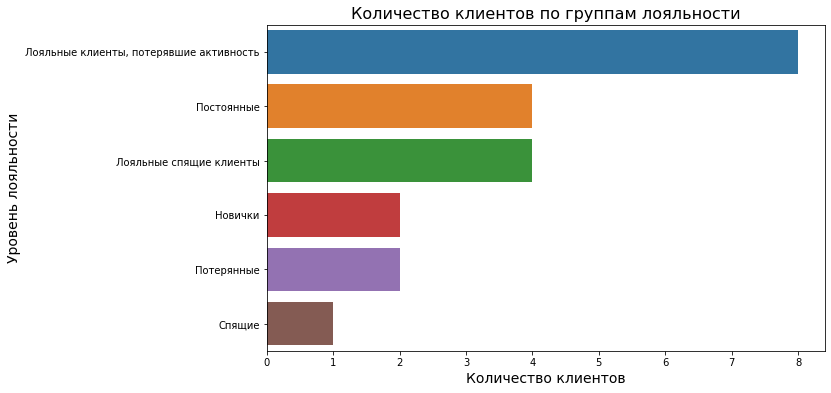

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x=loyalty_groups.values, y=loyalty_groups.index)
plt.title('Количество клиентов по группам лояльности', fontsize=16)
plt.xlabel('Количество клиентов', fontsize=14)
plt.ylabel('Уровень лояльности', fontsize=14)
plt.show()

In [96]:
RFM_analisys.sort_values(by='Прирост суммы поставки', ascending=False)

,Номер магазина,Прирост суммы поставки,Прирост суммы поставки %,Recency,Frequency,Monetary,Лояльность
18,7158,1816288.0,829.4,1,1,3,Потерянные
9,7134,1024645.0,225.4,3,1,3,Новички
4,7161,920669.0,183.8,2,1,3,Спящие
19,7140,686793.0,1367.9,2,3,1,Лояльные спящие клиенты
20,7135,525219.0,1266.4,1,3,1,"Лояльные клиенты, потерявшие активность"
2,7126,495206.0,81.2,3,3,3,Постоянные
3,7118,487833.0,82.1,2,3,2,Лояльные спящие клиенты
1,7136,417835.0,47.5,1,1,3,Потерянные
17,7139,371310.0,132.0,1,3,1,"Лояльные клиенты, потерявшие активность"
15,7138,349762.0,108.0,2,3,2,Лояльные спящие клиенты


<p style='font-size: 20px; font-family: Roboto;'> Наше разделение очень условное, так как давность больше 107 дней (3 месяца) - это на самом деле мало <br> 
    Данное разделение приведено в образовательных целях </p>

<h1 style="font-size:24px; 
           background-image: linear-gradient(45deg, #87CEFA, white);
           color: black;
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;" id='prof'> Анализ доходов продавца (сезонность)</h1>

In [97]:
data_2019['Месяц'] = data_2019['Дата поставки'].dt.month
data_2020['Месяц'] = data_2020['Дата поставки'].dt.month

In [98]:
#способ сгруппировать наши данные через groupby
pivot_2019 = data_2019.groupby('Месяц', as_index=False).agg({'Сумма поставки':['mean', 'median']})
pivot_2019

Месяц Сумма поставки        
                   mean  median
0      1        27534.7 18907.0
1      2        35677.3 37466.0
2      3        40689.6 40826.0
3      4        27219.5 22065.0
4      5        36439.7 40694.0
5      6        20957.0 17516.0
6      7        54915.0 54915.0
7      8        64893.0 64893.0
8      9        26639.5 26639.5
9     10        31758.7 36369.0
10    12        33727.5 42597.0

In [99]:
#аналогичный результат через pivot_table
pivot_2020 = pd.pivot_table(data_2020, index=['Месяц'], aggfunc={'Сумма поставки': [np.mean, np.median],}).reset_index()
pivot_2020

Месяц Сумма поставки        
                   mean  median
0      1        32778.1 35503.0
1      2        35710.6 36301.0
2      3        30658.2 28194.5
3      4        30762.8 27543.5
4      5        26953.3 21949.0
5      6        35113.9 33641.5
6      7        37143.3 36527.0
7      8        37086.2 38005.0
8      9        30524.9 27851.0
9     10        28993.6 26952.0
10    11        52318.0 52318.0
11    12        32221.3 32666.5

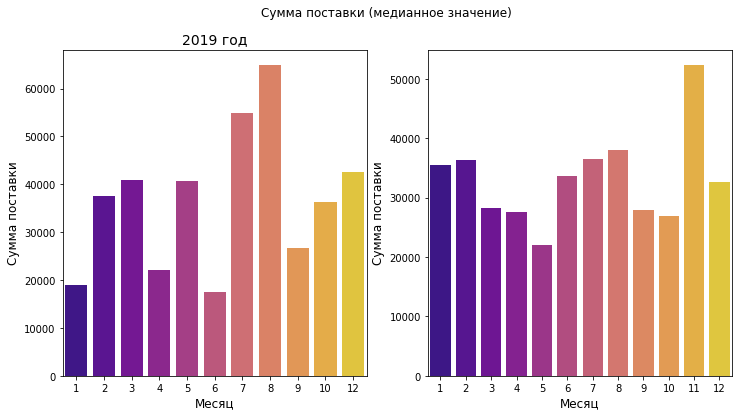

In [100]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Сумма поставки (медианное значение)')
sns.barplot(x=pivot_2019['Месяц'], y=pivot_2019['Сумма поставки', 'median'], ax=axs[0], palette='plasma')
axs[0].set_title('2019 год', fontsize=14)
axs[0].set_ylabel('Сумма поставки', fontsize=12)
axs[0].set_xlabel('Месяц', fontsize=12)
sns.barplot(x=pivot_2020['Месяц'], y=pivot_2020['Сумма поставки', 'median'], ax=axs[1], palette='plasma')
axs[1].set_ylabel('Сумма поставки', fontsize=12)
axs[1].set_xlabel('Месяц', fontsize=12)
plt.show()

<hr>
<p style='font-size: 20px; font-family: Roboto;'> Сезонность не прослеживается </p>
<hr>

<h1 style="font-size:24px; 
           background-image: linear-gradient(45deg, #87CEFA, white);
           color: black;
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;" id='conc'>Анализ объёмов и сумм поставок</h1>

<hr>
<p style='font-size: 20px; font-family: Roboto;'>
    В данном анализе проанализируем тренды объёмов и сумм поставок.<br>
    Что мы хотим увидеть? Нам нужно понять, как поставки влияют на сумму. Как менялся объём и медиана суммы поставок за 2 года. <br>
</p>
<hr>

In [101]:
data_2019.describe()

,Номер заказа,Номер магазина,Код товара,Сумма поставки,Год,Месяц
count,271.0,271.0,271.0,271.0,271.0,271.0
mean,40986.9,7137.7,446526.8,35093.9,2019.0,3.4
std,27813.8,18.4,113515.0,18974.2,0.0,2.9
min,2968.0,7110.0,111864.0,1267.0,2019.0,1.0
25%,21924.0,7125.0,497028.0,18893.5,2019.0,2.0
50%,40155.0,7135.0,497032.0,37466.0,2019.0,2.0
75%,50755.0,7155.0,497035.0,52605.5,2019.0,3.0
max,112601.0,7167.0,509369.0,65583.0,2019.0,12.0


In [102]:
data_2020.describe()

,Номер заказа,Номер магазина,Код товара,Сумма поставки,Год,Месяц
count,507.0,507.0,507.0,507.0,507.0,507.0
mean,52150.4,7137.8,411595.8,33227.4,2020.0,5.2
std,29487.9,16.1,141995.0,19057.1,0.0,2.6
min,3491.0,7110.0,111855.0,1308.0,2020.0,1.0
25%,33760.0,7126.0,237553.0,16214.0,2020.0,3.0
50%,53061.0,7136.0,512016.0,32328.0,2020.0,6.0
75%,64473.0,7158.0,518703.0,50635.0,2020.0,7.0
max,130090.0,7167.0,524468.0,65891.0,2020.0,12.0


In [113]:
#считаем медиану суммы поставки и количество поставок по месяцам
median_sum_2019 = data_2019.groupby('Месяц', as_index=False).agg({'Сумма поставки':'median', 'Дата поставки':'count'})

In [104]:
#добавим в 2019 год данные за ноябрь по медиане года
median_sum_2019 = median_sum_2019.append({'Месяц':11, 'Сумма поставки': 37466.0, 'Дата поставки': 15}, ignore_index=True)

In [105]:
median_sum_2020 = data_2020.groupby('Месяц', as_index=False).agg({'Сумма поставки':'median', 'Дата поставки':'count'})

In [114]:
#добавляем новую фичу "Цена одной поставки"
median_sum_2019['Цена одной поставки'] = median_sum_2019['Сумма поставки'] / median_sum_2019['Дата поставки']
median_sum_2019

,Месяц,Сумма поставки,Дата поставки,Цена одной поставки
0,1,18907.0,3,6302.3
1,2,37466.0,187,200.4
2,3,40826.0,19,2148.7
3,4,22065.0,17,1297.9
4,5,40694.0,9,4521.6
5,6,17516.0,3,5838.7
6,7,54915.0,1,54915.0
7,8,64893.0,1,64893.0
8,9,26639.5,2,13319.8
9,10,36369.0,11,3306.3


In [107]:
median_sum_2020['Цена одной поставки'] = median_sum_2020['Сумма поставки'] / median_sum_2020['Дата поставки']
median_sum_2020

,Месяц,Сумма поставки,Дата поставки,Цена одной поставки
0,1,35503.0,31,1145.3
1,2,36301.0,56,648.2
2,3,28194.5,48,587.4
3,4,27543.5,90,306.0
4,5,21949.0,24,914.5
5,6,33641.5,118,285.1
6,7,36527.0,51,716.2
7,8,38005.0,33,1151.7
8,9,27851.0,10,2785.1
9,10,26952.0,39,691.1


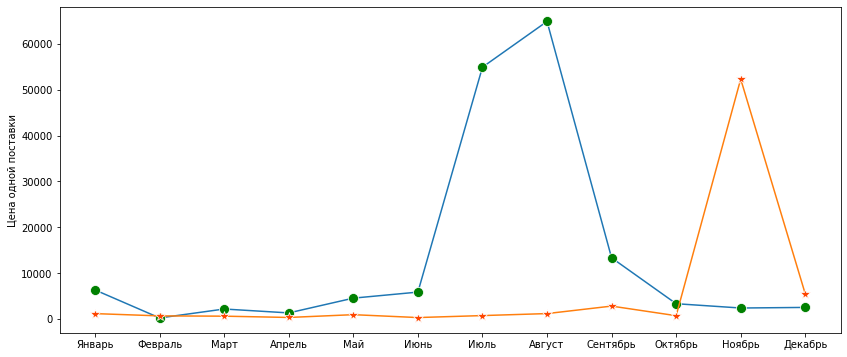

In [108]:
month = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
plt.figure(figsize=(14, 6))
sns.lineplot(y = median_sum_2019['Цена одной поставки'], x=month,  marker='o', markerfacecolor='green', markersize=10)
sns.lineplot(median_sum_2020['Цена одной поставки'],  marker='*', markerfacecolor='orangered', markersize=10)
plt.show()

In [109]:
median_sum_2019.describe()

,Месяц,Сумма поставки,Дата поставки,Цена одной поставки
count,12.0,12.0,12.0,12.0
mean,6.5,36696.1,23.8,13467.3
std,3.6,14128.2,51.9,22056.0
min,1.0,17516.0,1.0,200.4
25%,3.8,25495.9,2.8,2312.1
50%,6.5,37466.0,10.0,3913.9
75%,9.2,41268.8,17.2,8056.7
max,12.0,64893.0,187.0,64893.0


In [110]:
median_sum_2020.describe()

,Месяц,Сумма поставки,Дата поставки,Цена одной поставки
count,12.0,12.0,12.0,12.0
mean,6.5,33121.0,42.2,5582.8
std,3.6,7782.6,34.3,14789.3
min,1.0,21949.0,1.0,285.1
25%,3.8,27774.1,20.5,633.0
50%,6.5,33154.0,36.0,815.4
75%,9.2,36357.5,52.2,1560.0
max,12.0,52318.0,118.0,52318.0


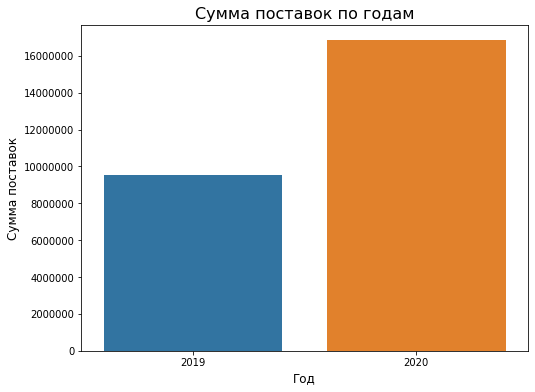

In [111]:
plt.figure(figsize=(8, 6))
sns.barplot(x = ['2019', '2020'], y=[data_2019['Сумма поставки'].sum(), data_2020['Сумма поставки'].sum()])
plt.title("Сумма поставок по годам", fontsize=16)
plt.xlabel("Год", fontsize=12)
plt.ylabel("Сумма поставок", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

<hr>
<p style='font-size: 20px; font-family: Roboto;'> Что можно заключить из этих данных и графика: <br>
    * в 2019 году был выброс в летние месяцы, когда цена одной поставки доходила до отметки 50000-60000 за одну доставку;<br>
    * в 2019 году медиана одной поставки была на отметке 3913.9, в 2020 году она упала до 815.4. Другими словами, продавец вынужден делать 4 поставки в 2020 году по цене одной в 2019 году, что накладывает дополнительные транспортные расходы;<br>
    * в ноябре 2020 года был выброс до отметки 52318.0;<br>
    * в 2019 году цена одной поставки была выше; <br>
    </p>
    <hr>

<h1 style="font-size:24px; 
           background-image: linear-gradient(45deg, #87CEFA, white);
           color: black;
           background-clip: text;
           -webkit-background-clip: text; 
           padding-top:15px;
           padding-left:15px;
           padding-bottom: 15px;
           line-height: 120%;
           border-radius: 5px;" id='conc'>Заключение</h1>

<p style='font-size: 20px; font-family: Roboto;'>
    На основе проведённых анализов, какие выводы и рекомендации мы можем дать продавцу:
<ul style='font-size: 20px; font-family: Roboto;'>
        <li>если имеется возможность восстановить поставки товаров с кодами 497037, 497031, 497035, 497033, 497029, 497036 и провести AB-тест;</li>
        <li>если имеется возможность, убрать из ассортимента самые убыточные товары групп "B" и "C" и провести AB-тест;</li>
        <li>добавить специальные условия для лояльных спящих и лояльных утративших активность клиентов;</li>
        <li>сосредоточить своё внимание на постоянных клиентах и новичках, возможно специальные предложения или скидки;</li>
        <li>не смотря на то, что сумма поставок в 2020 году выросла на 77%, цена одной поставки упала в 4 раза, что может повлечь за собой дополнительные транспортные и складские расходы;</li>
    </ul>